# Multi-Class Text Classification with Turkish Dataset
https://www.kaggle.com/code/darkcore/multi-class-text-classification-with-cnn/notebook

<h3>In this kernel, I will try to classify "comments"(text) with "categories"(text) using CNN</h3>
<p style="font-size:20px">Table of Content</p>

* [Data Overview](#1)
* [Word Overview](#2)
* [NLP Processing](#3)
* [ANN Building and Fitting](#4)
* [CNN Building and Fitting](#5)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from warnings import filterwarnings

# 경고 메시지를 무시합니다.
filterwarnings('ignore')

# 필요한 라이브러리를 가져옵니다.
import os

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
# print("Added shopping_cart.png for wordcloud")

2023-10-19 18:01:52.814469: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-19 18:01:53.525072: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:460] Initializing the SageMaker Profiler.
2023-10-19 18:01:53.526081: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:105] SageMaker Profiler is not enabled. The timeline writer thread will not be started, future recorded events will be dropped.
2023-10-19 18:01:53.674379: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:460] Initializing the SageMaker Profiler.


# **Data Overview** <a id="1"></a>

In [4]:
# data = pd.read_csv('/kaggle/input/multiclass-classification-data-for-turkish-tc32/ticaret-yorum.csv')
# pd.set_option('max_colwidth', 500)
# data.head(5)

In [5]:
data =pd.read_csv('../dataset/A-Track-clean.csv')  # Replace with your CSV file path
pd.set_option('max_colwidth', 500)
data.head(5)

,Unnamed: 0,payload,label_action
0,0,"get /forum1_professionnel.asp?n=/.\\\""./.\\\""./.\\\""./.\\\""./.\\\""./boot.ini&amp;nn=100&amp;page=1|234|800a0bcd|either_bof_or_eof_is_true__or_the_current_record_has_been_deleted._requested_operation_requires_a_current_record. http/1.1\r\nconnection: keep-alive\r\nuser-agent: mozilla/5.00 (nikto/2.1.6) (evasions:none) (test:002421)\r\ncontent-type: application/x-www-form-urlencoded\r\ncontent-length: 36\r\nhost: 10.0.17.21\r\n\r\n<!--#include virtual=\""/indomainabc063.jsp\""-->",System_Cmd_Execution
1,1,"post /owa/auth/logon.aspx?replacecurrent=1"") and 9294=utl_inaddr.get_host_address(chr(113)||chr(112)||chr(98)||chr(120)||chr(113)||(select (case when (9294=9294) then 1 else 0 end) from dual)||chr(113)||chr(122)||chr(106)||chr(107)||chr(113)) and (""tddx""=""tddx&reason=3&url= http/1.1\r\ncontent-length: 0\r\ncache-control: no-cache\r\nuser-agent: sqlmap/1.6.7#stable (https://sqlmap.org)\r\nreferer: http://owa.college.school:80/owa/auth/logon.aspx\r\nhost: owa.college.school\r\naccept: */*\r\na...",System_Cmd_Execution
2,2,"get /goods/goods_search?display_type=list&arr_search_list[0][search_type]=-1839 or 1=2&arr_search_list[0][search]=1&arr_search_list[1][search_type]=gm.name&arr_search_list[1][search]=1&arr_search_list[2][search_type]=gm.name&arr_search_list[2][search]=1&search_include=y&search=1&search_type=gm.name http/1.1\r\nhost: www.college.school\r\nauthorization: negotiate tlrmtvntuaabaaaat4ii4gaaaaaaaaaaaaaaaaaaaaakaf1yaaaadw==\r\naccept-encoding: gzip, deflate\r\nuser-agent: mozilla/5.0 (gecko) arach...",SQL_Injection
3,3,get / http/1.1\r\n\r\n,HOST_Scan
4,4,"get /sub_04_1_read.php?page=1&id=31);select * from generate_series(9156,9156,case when (9156=5350) then 1 else 0 end) limit 1-- http/1.1\r\ncache-control: no-cache\r\nuser-agent: sqlmap/1.6.10#stable (https://sqlmap.org)\r\nreferer: http://10.0.17.20:80/sub_04_1_read.php\r\nhost: 10.0.17.20\r\naccept: */*\r\naccept-encoding: gzip,deflate\r\nconnection: close\r\n\r\n",System_Cmd_Execution


In [6]:
# data.describe()

In [7]:
data.describe()

,Unnamed: 0
count,45000.000000
mean,22499.500000
std,12990.525394
min,0.000000
25%,11249.750000
50%,22499.500000
75%,33749.250000
max,44999.000000


In [8]:
# data.info()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    45000 non-null  int64 
 1   payload       45000 non-null  object
 2   label_action  45000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [10]:
# data.category.value_counts()

In [11]:
data['label_action'].value_counts()

Vulnerability_Scan               16867
System_Cmd_Execution              9807
HOST_Scan                         6315
Path_Disclosure                   4775
SQL_Injection                     3395
Cross_Site_Scripting              1348
Automatically_Searching_Infor     1119
Leakage_Through_NW                 956
Directory_Indexing                 418
Name: label_action, dtype: int64

<h2>So data contains 431306 lines and 32 unique categories and it seems there is no NaN, right?</h2>
<h3>But why text label has 4075 (431306-427231) non-unique comments? And we have a "top" comment starts with "Cinemaximum 4 Aydır" so let's check what it is  </h3>

In [12]:
# count = 0
# cinemaximum4aydir = "Cinemaximum 4 Aydır Bilet Paralarını Bir Türlü İade Etmiyor,"
# for text in data.text:
#     if cinemaximum4aydir in text[:len(cinemaximum4aydir)]:
#         count += 1
# print(count)

So they really are duplicated...

We don't need to but I want to get rid of every non-unique comment so I will use pandas' 2 functions named "duplicated" and "drop_duplicates"

"duplicated" gets keep={‘first’, ‘last’, False} parameter and can be used both "pandas.DataFrame" and "pandas.Series" objects and returns "pandas.Series" object with True-False statements 

"drop_duplicates" works like "dropna" so it gets inplace={True,False} and subset={column label} with keep={‘first’,‘last’ False}
There is also another parameter named ignore_index={True,False} let me explain this
In default ignore_index=False it means if it remove a duplicated, index will not change so 1-a,2-a,3-b will be 1-a,3-b and it breaks for loop with len(data) because of that we need to change ignore_index


In default keep ="first"


In [13]:
# exampleArray = np.array([[1,1],[1,2],[4,5]])
# exampleFrame = pd.DataFrame(exampleArray,columns=["ex1","ex2"])
# exampleFrame

In [14]:
# ex1 = exampleFrame.drop_duplicates(subset="ex1",keep="first")
# print("Without ignore_index")
# print(ex1)
# ex2 = exampleFrame.drop_duplicates(subset="ex1",keep="first",ignore_index=True)
# print("With ignore_index")
# print(ex2)

In [15]:
# data.text.duplicated(keep="first").value_counts()

In [16]:
# # data['payload'].duplicated(keep="first").value_counts()
# data['payload'].duplicated(keep=False).value_counts()

In [17]:
# data.drop_duplicates(subset="text",keep="first",inplace=True,ignore_index=True)
# data.describe()

<h2> Now we can visualize Category</h2>

In [18]:
# import plotly.graph_objects as go
# from plotly.offline import iplot, init_notebook_mode
# import plotly.express as px
# import plotly.io as pio

# init_notebook_mode(True)

# fig = px.bar(x=data.category.value_counts().index,y=data.category.value_counts(),color=data.category.value_counts().index,text=data.category.value_counts())
# fig.update_traces(hovertemplate="Category:'%{x}' Counted: %{y}")
# fig.update_layout(title={"text":"Category Counts","x":0.5,"font":{"size":35}},xaxis={"title":"Category","showgrid":False},yaxis={"title":"Value","showgrid":False},plot_bgcolor="white",width=800,height=500,showlegend=False)
# iplot(fig)

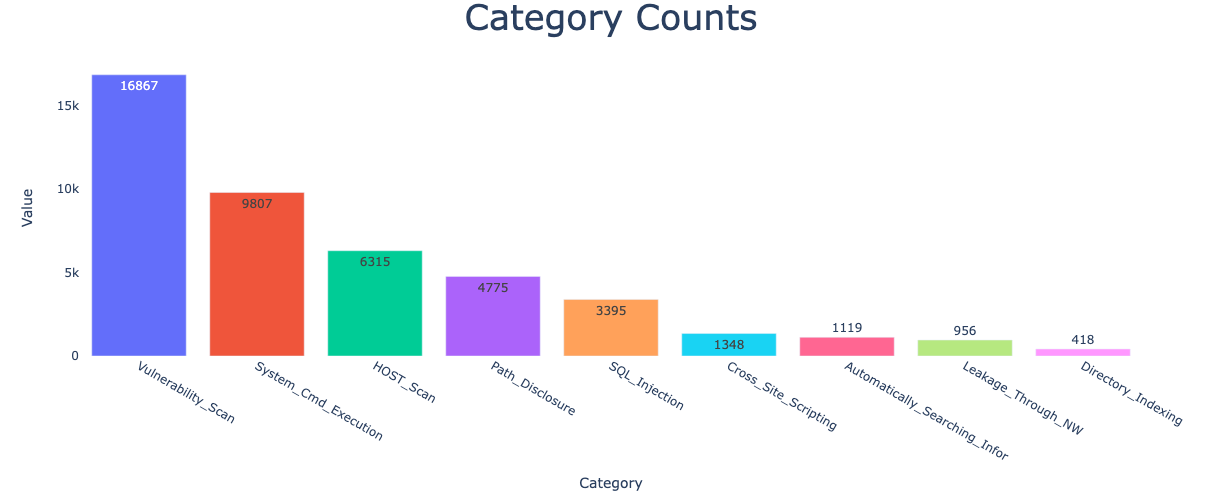

In [19]:
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import plotly.io as pio

init_notebook_mode(True)

fig = px.bar(x=data['label_action'].value_counts().index,y=data['label_action'].value_counts(),color=data['label_action'].value_counts().index,text=data['label_action'].value_counts())
fig.update_traces(hovertemplate="Category:'%{x}' Counted: %{y}")
fig.update_layout(title={"text":"Category Counts","x":0.5,"font":{"size":35}},xaxis={"title":"Category","showgrid":False},yaxis={"title":"Value","showgrid":False},plot_bgcolor="white",width=800,height=500,showlegend=False)
iplot(fig)

In [20]:
# fig1 = px.pie(data,values=data.category.value_counts(),names=data.category.value_counts().index)
# fig1.update_traces(textposition='auto', textinfo='percent+label',marker={"line":{"width":1}},hoverinfo='label+percent',hole=0.4)
# fig1.update_layout(annotations=[{"text":"Percentages","showarrow":False,"font_size":17}])
# iplot(fig1)

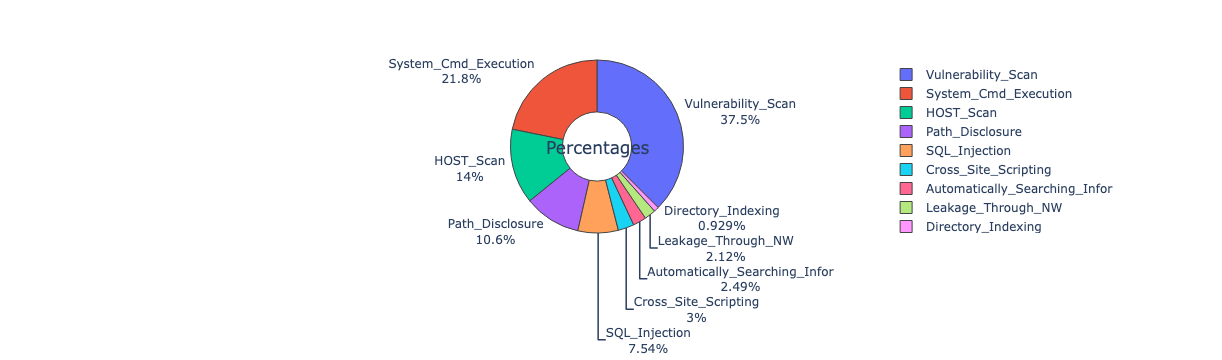

In [21]:
fig1 = px.pie(data,values=data['label_action'].value_counts(),names=data['label_action'].value_counts().index)
fig1.update_traces(textposition='auto', textinfo='percent+label',marker={"line":{"width":1}},hoverinfo='label+percent',hole=0.4)
fig1.update_layout(annotations=[{"text":"Percentages","showarrow":False,"font_size":17}])
iplot(fig1)

# **Word Overview** <a id="2"></a>
<h3> Let's start with word list</h3>

In [22]:
# import re

# wordList = list()
# for i in range(len(data)):
#     temp = data.text[i].split()
#     for k in temp:
#         k = re.sub("[^a-zA-ZğĞüÜşŞıİöÖçÇ]","",k)
#         if k != "":
#             wordList.append(k)

In [23]:
import re

wordList = list()
for i in range(len(data)):
    temp = data['payload'][i].split()
    for k in temp:
        # k = re.sub("[^a-zA-Z]", "", k)
        # if k != "":
        wordList.append(k)

In [24]:
from collections import Counter

wordCount = Counter(wordList)
countedWordDict = dict(wordCount)
sortedWordDict = sorted(countedWordDict.items(),key = lambda x : x[1],reverse=True)

print("Most Used 20 Words")
for word,counted in sortedWordDict[0:20]:
    print("{} : {}".format(word,counted))

Most Used 20 Words
get : 32167
mozilla/5.0 : 23917
http/1.1\r\nhost: : 20622
post : 11600
nt : 10528
(windows : 10194
10.0; : 9038
win64; : 8875
text/html,application/xhtml : 8625
gzip, : 8609
gecko/20100101 : 7494
www.mall.shop\r\nuser-agent: : 7173
mozilla/5.00 : 7066
(nikto/2.1.6) : 7066
(evasions:none) : 7066
shopreferer=; : 6825
deflate\r\nuser-agent: : 6587
(gecko) : 6563
arachni/v10.0.0.80\r\naccept: : 6563
negotiate : 6520


In [25]:
from collections import Counter

wordCount = Counter(wordList)
countedWordDict = dict(wordCount)
sortedWordDict = sorted(countedWordDict.items(),key = lambda x : x[1],reverse=True)

print("Most Used 20 Words")
for word,counted in sortedWordDict[0:20]:
    print("{} : {}".format(word,counted))

Most Used 20 Words
get : 32167
mozilla/5.0 : 23917
http/1.1\r\nhost: : 20622
post : 11600
nt : 10528
(windows : 10194
10.0; : 9038
win64; : 8875
text/html,application/xhtml : 8625
gzip, : 8609
gecko/20100101 : 7494
www.mall.shop\r\nuser-agent: : 7173
mozilla/5.00 : 7066
(nikto/2.1.6) : 7066
(evasions:none) : 7066
shopreferer=; : 6825
deflate\r\nuser-agent: : 6587
(gecko) : 6563
arachni/v10.0.0.80\r\naccept: : 6563
negotiate : 6520


<h2>So they are most used 20 words... </h2>
<h3>But why is "oku" -"read" in english- used 386776 times even if there are 427231	texts? Let's see...</h3>

In [26]:
# for i in data["text"][7:10]:
#     if "oku" in i:
#         print(i)
#         print("*"*20)

<h2>As we can see 'oku' and 'oku"' used with "Devamını" -"more" in english-</h2>
<h3>We know this dataset contains "comments" so "... Devamını oku" is used to see rest of the comment. It means we can clear it too for better visualization!</h3>

In [27]:
# def dontReadMore(text):
#     temptext = text.split(".")
#     if "Devamını" in temptext[-1]:
#         text = temptext[:-1]
#     return "".join(text)

# data["text"] = data["text"].apply(dontReadMore)

In [28]:
# for i in data["text"][200:500]:
#     if "oku" in i:
#         print(i)
#         print("*"*20)

<h3>Now we can visualize with REAL most used words </h3>

In [29]:
# wordList = list()
# for i in range(len(data)):
#     temp = data.text[i].split()
#     for k in temp:
#         k = re.sub("[^a-zA-ZğĞüÜşŞıİöÖçÇ]","",k)
#         if k != "":
#             wordList.append(k)
# wordCount = Counter(wordList)
# countedWordDict = dict(wordCount)
# sortedWordDict = sorted(countedWordDict.items(),key = lambda x : x[1],reverse=True)
# print("REAL Most Used 20 Words")
# for word,counted in sortedWordDict[0:20]:
#     print("{} : {}".format(word,counted))

In [30]:
# num = 75 # For using most used 75 words
# list1 = list()
# list2 = list()
# for i in range(num):
#     list1.append(wordCount.most_common(num)[i][0])
#     list2.append(wordCount.most_common(num)[i][1])

In [31]:
# fig2 = px.bar(x=list1,y=list2,color=list2,hover_name=list1,hover_data={'Word':list1,"Count":list2})
# fig2.update_traces(hovertemplate="Word:'%{x}' Value: %{y}")
# fig2.update_layout(title={"text":"Word Values","x":0.5,"font":{"size":30}},xaxis={"title":"Words","showgrid":False},yaxis={"title":"Value","showgrid":False},plot_bgcolor="white")
# fig2.show()

In [32]:
# from PIL import Image

# shopping_cart = np.array(Image.open("/kaggle/input/shopping-cart/shopping_cart.png"))
# plt.imshow(shopping_cart)

In [33]:
# from wordcloud import WordCloud
# from nltk.corpus import stopwords

# def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
#     return("hsl(0,0%%, %d%%)" % np.random.randint(50,55))

# stopwordCloud = set(stopwords.words("turkish"))

# wordcloud = WordCloud(stopwords=stopwordCloud,max_words=1000,background_color="white",min_font_size=3,mask=shopping_cart).generate_from_frequencies(countedWordDict)
# wordcloud.recolor(color_func = grey_color_func)
# plt.figure(figsize=[13,10])
# plt.axis("off")
# plt.title("Word Cloud",fontsize=20)
# plt.imshow(wordcloud)
# plt.show()

# **NLP Processing** <a id="3"></a>

In [34]:
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# from nltk import word_tokenize
# import time

# ps = PorterStemmer()
# stopwordSet = set(stopwords.words('turkish'))

# t = time.time()

# def leadMyWord(text):
#     text = re.sub('[^a-zA-ZğĞüÜşŞıİöÖçÇ]'," ",text)
#     text = text.lower()
#     text = word_tokenize(text,language='turkish')
#     text = [word for word in text if not word in stopwordSet]
#     text = " ".join(text)
#     return text   

# textList = data.text.apply(leadMyWord)
# textList = list(textList)

# print("Before")
# print(data["text"][2])
# print("After")
# print(textList[2])
# print("Time Passed")
# print(time.time()-t)

In [35]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
import time
import re
ps = PorterStemmer()
stopwordSet = set(stopwords.words('english'))

t = time.time()

def clean_text(text):
    text = re.sub('[^a-zA-Z]', '{p}', text)
    text = text.lower()
    text = word_tokenize(text)
    text = [word for word in text if word not in stopwordSet]
    text = " ".join(text)
    return text

textList = data['payload'].apply(clean_text)
textList = list(textList)

print("Before")
print(data['payload'][2])
print("After")
print(textList[2])
print("Time Passed")
print(time.time() - t)


Before
get /goods/goods_search?display_type=list&arr_search_list[0][search_type]=-1839 or 1=2&arr_search_list[0][search]=1&arr_search_list[1][search_type]=gm.name&arr_search_list[1][search]=1&arr_search_list[2][search_type]=gm.name&arr_search_list[2][search]=1&search_include=y&search=1&search_type=gm.name http/1.1\r\nhost: www.college.school\r\nauthorization: negotiate tlrmtvntuaabaaaat4ii4gaaaaaaaaaaaaaaaaaaaaakaf1yaaaadw==\r\naccept-encoding: gzip, deflate\r\nuser-agent: mozilla/5.0 (gecko) arachni/v10.0.0.80\r\naccept: text/html,application/xhtml xml,application/xml;q=0.9,*/*;q=0.8\r\naccept-language: en-us,en;q=0.8,he;q=0.6\r\nx-arachni-scan-seed: 4818b1cc56353e785f9bfe9b055b7183\r\ncookie: designart_site=cg0q4hq5j1rgo9o2ns7s3nsnjlauq1rp\r\n\r\n
After
get { p } { p } goods { p } goods { p } search { p } display { p } type { p } list { p } arr { p } search { p } list { p } { p } { p } { p } search { p } type { p } { p } { p } { p } { p } { p } { p } { p } { p } { p } { p } { p } { p

In [36]:
#preparing y

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
labelEncode = le.fit_transform(data["label_action"])
print("LabelEncode")
print(labelEncode)
categorical_y = to_categorical(labelEncode)
print("To_Categorical")
print(categorical_y)

LabelEncode
[7 7 6 ... 6 5 8]
To_Categorical
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


# **ANN Building and Fitting** <a id="4"></a>

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#preparing x for ANN
# tfidv = TfidfVectorizer(max_features=20001)
tfidv = TfidfVectorizer(max_features=10000)
x = tfidv.fit_transform(textList)
x.sort_indices()

x_train,x_test,y_train,y_test = train_test_split(x,categorical_y,test_size=0.2,random_state=42)

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.losses import categorical_crossentropy

def build_ann_model():
    model = Sequential()
    
    model.add(Dense(units=1024,activation="relu",input_dim=x_train.shape[1]))
    model.add(Dense(units=512,activation="relu"))
    model.add(Dense(units=256,activation="relu"))
    model.add(Dense(units=y_train.shape[1],activation="softmax"))
    
    optimizer = Adam(lr=0.000015,beta_1=0.9,beta_2=0.999)
    
    model.compile(optimizer=optimizer,metrics=["accuracy"],loss=categorical_crossentropy)
    return model

In [39]:
# !pip install pydot

In [40]:
# !sudo apt-get install graphviz

In [41]:
ann_model = build_ann_model()
plot_model(ann_model,show_shapes=True)

2023-10-19 18:05:19.340911: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-19 18:05:19.358349: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [42]:
ann_history = ann_model.fit(x_train,y_train,epochs=10,batch_size=256,shuffle=True)
ypred = ann_model.predict(x_test)

Epoch 1/10
141/141 [==============================] - 25s 156ms/step - loss: 2.1114 - accuracy: 0.3625
Epoch 2/10
141/141 [==============================] - 22s 157ms/step - loss: 1.7336 - accuracy: 0.3803
Epoch 3/10
141/141 [==============================] - 22s 156ms/step - loss: 1.3576 - accuracy: 0.5263
Epoch 4/10
141/141 [==============================] - 22s 155ms/step - loss: 1.0789 - accuracy: 0.6327
Epoch 5/10
141/141 [==============================] - 22s 154ms/step - loss: 0.8811 - accuracy: 0.7038
Epoch 6/10
141/141 [==============================] - 22s 155ms/step - loss: 0.7503 - accuracy: 0.7469
Epoch 7/10
141/141 [==============================] - 22s 155ms/step - loss: 0.6597 - accuracy: 0.7746
Epoch 8/10
141/141 [==============================] - 22s 155ms/step - loss: 0.5945 - accuracy: 0.7968
Epoch 9/10
141/141 [==============================] - 22s 155ms/step - loss: 0.5463 - accuracy: 0.8123
Epoch 10/10
282/282 [==============================] - 3s 7ms/step


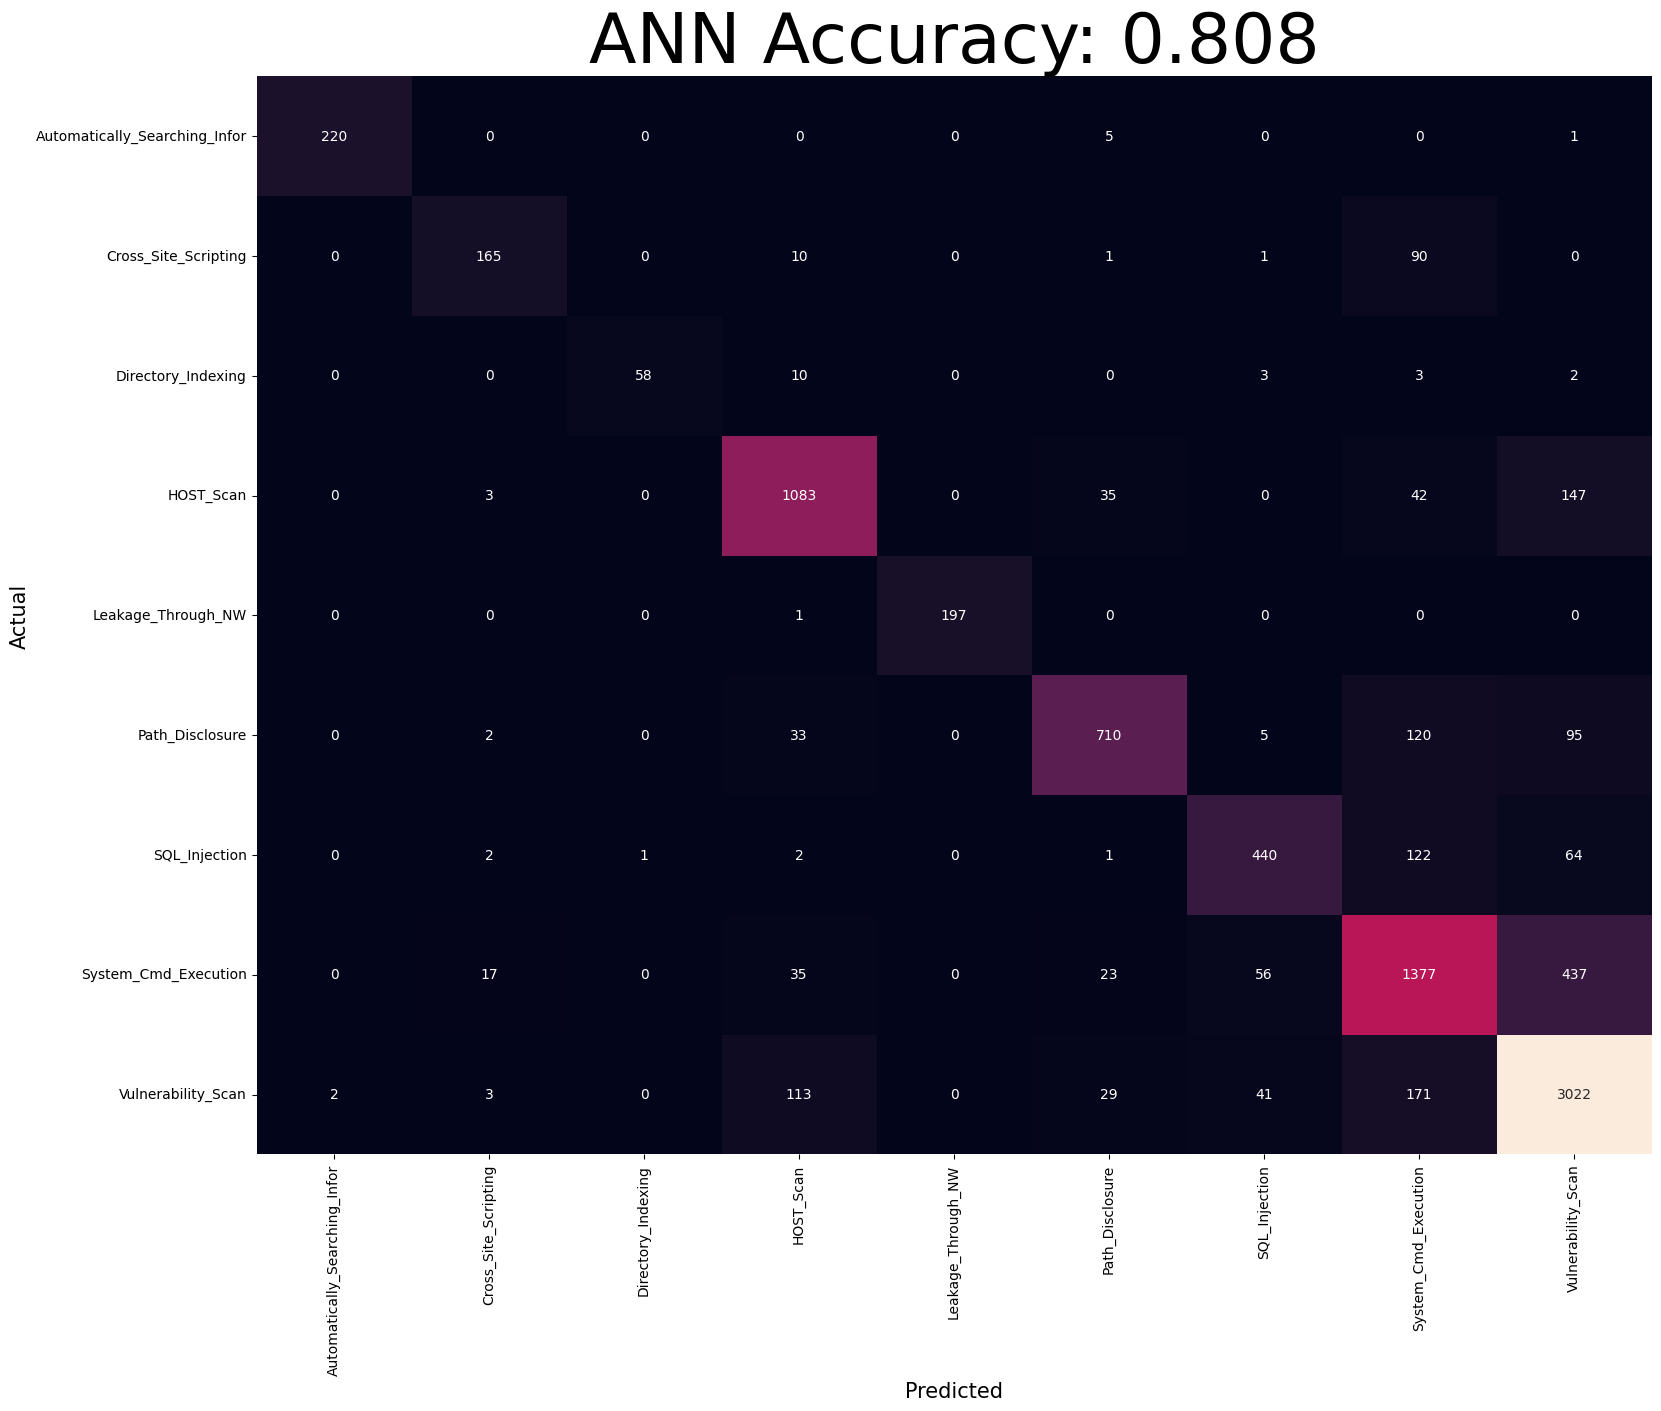

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

ann_accuracy = accuracy_score(y_test.argmax(axis=-1),ypred.argmax(axis=-1))
#print("ANN Accuracy:",ann_accuracy)
ann_cn = confusion_matrix(y_test.argmax(axis=-1),ypred.argmax(axis=-1))
plt.subplots(figsize=(18,14))
sns.heatmap(ann_cn,annot=True,fmt="1d",cbar=False,xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("ANN Accuracy: {}".format(ann_accuracy),fontsize=50)
plt.xlabel("Predicted",fontsize=15)
plt.ylabel("Actual",fontsize=15)
plt.show()

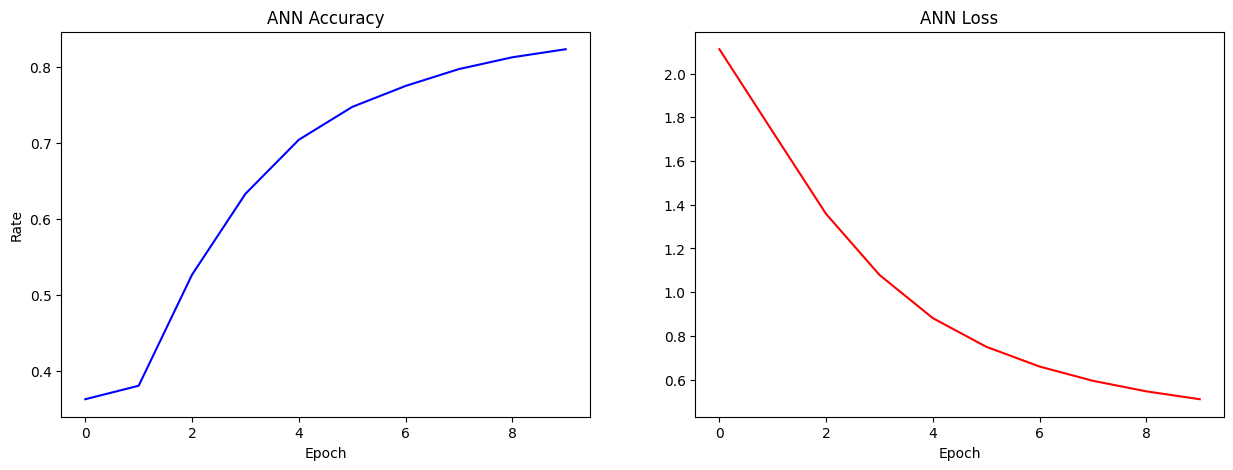

In [44]:
fig3, axe1 = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axe1[0].plot(ann_history.history["accuracy"],label="accuracy",color="blue")
axe1[1].plot(ann_history.history["loss"],label="loss",color="red")
axe1[0].title.set_text("ANN Accuracy")
axe1[1].title.set_text("ANN Loss")
axe1[0].set_xlabel("Epoch")
axe1[1].set_xlabel("Epoch")
axe1[0].set_ylabel("Rate")
plt.show()

# **CNN Building and Fitting** <a id="5"></a>

Before starting, I'm very grateful to Raj Mehrotra for sharing ["A Detailed Explanation of Keras Embedding Layer"](https://www.kaggle.com/rajmehra03/a-detailed-explanation-of-keras-embedding-layer)

In [1]:
from keras.preprocessing.text import one_hot
# from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

#preparing x for CNN
MAX_FEATURES = 20001

onehot_corpus = []
for text in textList:
    onehot_corpus.append(one_hot(text,MAX_FEATURES))
    
maxTextLen = 0
for text in textList:
    word_token=word_tokenize(text)
    if(maxTextLen < len(word_token)):
        maxTextLen = len(word_token)
        
print("Max number of words : ",maxTextLen)

padded_corpus=pad_sequences(onehot_corpus,maxlen=maxTextLen,padding='post')
# x_train2,x_test2,y_train2,y_test2 = train_test_split(padded_corpus,categorical_y,test_size=0.33,random_state=42)
x_train2,x_test2,y_train2,y_test2 = train_test_split(padded_corpus,categorical_y,test_size=0.2,random_state=42)

2023-10-19 18:52:21.112925: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-19 18:52:21.818299: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:460] Initializing the SageMaker Profiler.
2023-10-19 18:52:21.819210: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:105] SageMaker Profiler is not enabled. The timeline writer thread will not be started, future recorded events will be dropped.
2023-10-19 18:52:21.967426: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:460] Initializing the SageMaker Profiler.


NameError: name 'textList' is not defined

In [ ]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten
def build_cnn_model():
    model = Sequential()
    
    model.add(Embedding(MAX_FEATURES, 100, input_length=maxTextLen))


    model.add(Conv1D(64, 2, padding='same', activation='relu'))
    model.add(MaxPooling1D(2))
    #model.add(MaxPooling1D(2))
    
    model.add(Flatten())
    
    model.add(Dense(units=1024,activation="relu"))
    model.add(Dense(units=512,activation="relu"))
    
    model.add(Dense(units=y_train2.shape[1],activation="softmax"))
    
    optimizer = Adam(lr=0.000055,beta_1=0.9,beta_2=0.999)
    
    model.compile(optimizer=optimizer,metrics=["accuracy"],loss=categorical_crossentropy)
    return model

In [ ]:
cnn_model = build_cnn_model()
plot_model(cnn_model,show_shapes=True)

In [ ]:
cnn_history = cnn_model.fit(x_train2,y_train2,epochs=10,batch_size=1280,shuffle=True)
ypred2 = cnn_model.predict(x_test2)

In [ ]:
cnn_accuracy = accuracy_score(y_test2.argmax(axis=-1),ypred2.argmax(axis=-1))
#print("CNN Accuracy:",cnn_accuracy)
cnn_cn = confusion_matrix(y_test2.argmax(axis=-1),ypred2.argmax(axis=-1))
plt.subplots(figsize=(18,14))
sns.heatmap(cnn_cn,annot=True,fmt="1d",cbar=False,xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("CNN Accuracy: {}".format(cnn_accuracy),fontsize=50)
plt.xlabel("Predicted",fontsize=15)
plt.ylabel("Actual",fontsize=15)
plt.show()

In [ ]:
fig3, axe1 = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axe1[0].plot(cnn_history.history["accuracy"],label="accuracy",color="blue")
axe1[1].plot(cnn_history.history["loss"],label="loss",color="red")
axe1[0].title.set_text("CNN Accuracy")
axe1[1].title.set_text("CNN Loss")
axe1[0].set_xlabel("Epoch")
axe1[1].set_xlabel("Epoch")
axe1[0].set_ylabel("Rate")
plt.show()

In [ ]:
def ann_predict(text):
    puretext = leadMyWord(text)
    vector = tfidv.transform([puretext])
    vector.sort_indices()
    predicted = ann_model.predict(vector)
    predicted_category = predicted.argmax(axis=1)
    return le.classes_[predicted_category]
def cnn_predict(text):
    puretext = leadMyWord(text)
    onehottext = one_hot(puretext,MAX_FEATURES)
    text_pad = pad_sequences([onehottext],maxlen=maxTextLen,padding='post')
    predicted = cnn_model.predict(text_pad)
    predicted_category = predicted.argmax(axis=1)
    return le.classes_[predicted_category]
    
for _ in range(10):
    randint = np.random.randint(len(data))
    # text = data.text[randint]  
    text =data['payload'][randint]
    print("  Text")
    print("-"*8)
    print(text)
    print("-"*20)
    print("Actual Category: {}".format(data.category[randint]))
    print("ANN Predicted Category: {}".format(ann_predict(text)[0]))
    print("CNN Predicted Category: {}".format(cnn_predict(text)[0]))
    print("*"*50)
    

In [38]:
# #Let me try it too
# def predict_print(text):
#     print("  Text")
#     print("-"*8)
#     print(text)
#     print("-"*20)
#     print("ANN Predicted Category: {}".format(ann_predict(text)[0]))
#     print("CNN Predicted Category: {}".format(cnn_predict(text)[0]))
#     print("*"*50)
# myText = "Yemeğin içinden kıl çıktı, gitmenizi önermiyorum." # hair came out of the dish, I don't suggest you go
# predict_print(myText)
# myText = "Tuş bozuk." # Key Broken
# predict_print(myText)

  Text
--------
Yemeğin içinden kıl çıktı, gitmenizi önermiyorum.
--------------------
ANN Predicted Category: mekan-ve-eglence
CNN Predicted Category: gida
**************************************************
  Text
--------
Tuş bozuk.
--------------------
ANN Predicted Category: elektronik
CNN Predicted Category: enerji
**************************************************


<h1 >Thanks for reading, I'm open to your advices.</h1>